In [1]:
from gensim.models import Word2Vec
import pandas as pd
import multiprocessing
import logging
from utils import LossLogger
from datetime import datetime  
import pickle
import matplotlib.pyplot as plt

MDL_FOLDER = 'models/'
SRC_FOLDER = 'formatted/dataset/'

In [2]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')  # Format: YYYYMMDD_HHMMSS
log_filename = f'training_log_{timestamp}.txt'  # Log file name with timestamp
logger = logging.getLogger()
logger.setLevel(logging.INFO)
file_handler = logging.FileHandler(MDL_FOLDER + log_filename)
file_handler.setFormatter(logging.Formatter('%(asctime)s : %(levelname)s : %(message)s'))
stream_handler = logging.StreamHandler()
stream_handler.setFormatter(logging.Formatter('%(asctime)s : %(levelname)s : %(message)s'))
logger.addHandler(file_handler)
logger.addHandler(stream_handler)

In [5]:
with open(SRC_FOLDER + 'train.pkl', 'rb') as file:
    train_data = pickle.load(file)

# Train Word2Vec model
model = Word2Vec(vector_size=300, window=5, min_count=5, workers=multiprocessing.cpu_count(), epochs=400, sg=0, negative=5, alpha=0.1)
model.build_vocab(train_data)

loss_logger = LossLogger()
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs,  compute_loss=True, callbacks=[loss_logger])

model.save(MDL_FOLDER + f'w2v/w2v-trained-model-{timestamp}.model')
logger.info("Model trained and saved")

2024-10-02 20:09:06,620 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.05>', 'datetime': '2024-10-02T20:09:06.620737', 'gensim': '4.3.3', 'python': '3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]', 'platform': 'Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.35', 'event': 'created'}
2024-10-02 20:09:06,621 : INFO : collecting all words and their counts
2024-10-02 20:09:06,622 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-10-02 20:09:06,729 : INFO : PROGRESS: at sentence #10000, processed 659681 words, keeping 170567 word types


49000


2024-10-02 20:09:06,844 : INFO : PROGRESS: at sentence #20000, processed 1325962 words, keeping 265148 word types
2024-10-02 20:09:06,954 : INFO : PROGRESS: at sentence #30000, processed 1981742 words, keeping 340122 word types
2024-10-02 20:09:07,060 : INFO : PROGRESS: at sentence #40000, processed 2638977 words, keeping 401828 word types
2024-10-02 20:09:07,157 : INFO : collected 455415 word types from a corpus of 3248416 raw words and 49000 sentences
2024-10-02 20:09:07,158 : INFO : Creating a fresh vocabulary
2024-10-02 20:09:07,369 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 78871 unique words (17.32% of original 455415, drops 376544)', 'datetime': '2024-10-02T20:09:07.369944', 'gensim': '4.3.3', 'python': '3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]', 'platform': 'Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
2024-10-02 20:09:07,370 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 lea

KeyboardInterrupt: 

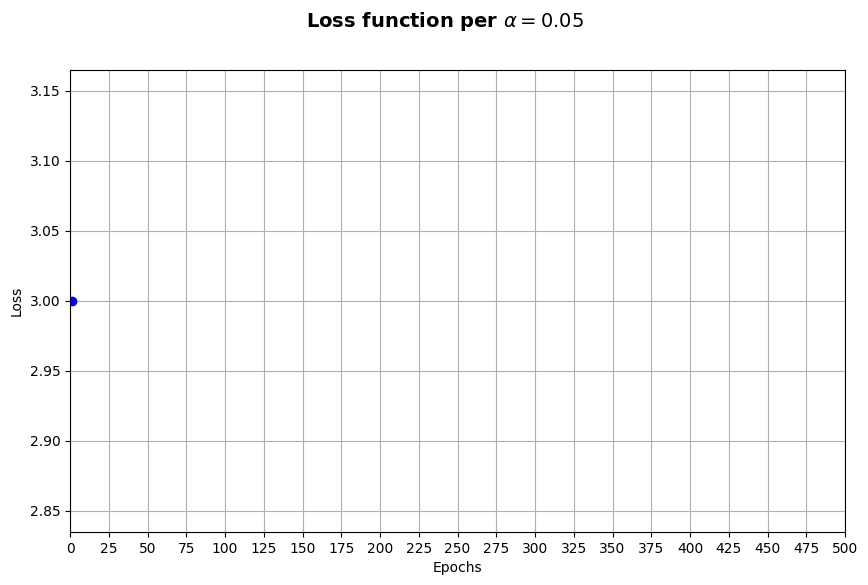

In [6]:
#questo po essere sostituito dalla lettura di un file
log_data = loss_logger.losses

epochs = list(log_data.keys())
losses = list(log_data.values())

# Creazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(epochs, losses, marker='o', linestyle='-', color='b')
fig.suptitle(rf'Loss function per $\alpha = {model.alpha}$', fontsize=14, fontweight='bold') # Titolo con la lettera greca alpha
ax.grid(True)
ax.set_xticks(range(0, model.epochs, 25)) 
ax.set_xlabel('Epochs')  # Etichetta asse X
ax.set_ylabel('Loss')    # Etichetta asse Y
plt.savefig(f'figures/w2v_loss_plot-{timestamp}.png')